# Pandas
[10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)

[Visualization with pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

[Pandas Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook)

In [1]:
import pandas as pd
import numpy as np 

# Import local csv (also works with URLs)
df = pd.read_csv('data/countries.csv')

# Basic exploration
print(df.shape) # (rows, cols)
print(df.columns)
df.drop_duplicates()
df.head()

(30, 8)
Index(['country', 'google_country_code', 'country_group', 'name_en', 'name_fr',
       'name_de', 'latitude', 'longitude'],
      dtype='object')


,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
0,at,AT,eu,Austria,Autriche,Österreich,47.696554,13.345980
1,be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
3,hr,HR,non-eu,Croatia,Croatie,Kroatien,44.746643,15.340844
4,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682


In [2]:
# rename a column
df = df.rename(columns={'google_country_code' : 'country_code'})

In [3]:
# Get the types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        30 non-null     object 
 1   country_code   30 non-null     object 
 2   country_group  30 non-null     object 
 3   name_en        30 non-null     object 
 4   name_fr        30 non-null     object 
 5   name_de        30 non-null     object 
 6   latitude       30 non-null     float64
 7   longitude      30 non-null     float64
dtypes: float64(2), object(6)
memory usage: 2.0+ KB


In [4]:
# Get descriptive stats on numeric values
df.describe()

,latitude,longitude
count,30.000000,30.000000
mean,49.092609,14.324579
std,7.956624,11.257010
min,35.129141,-8.239122
25%,43.230916,6.979186
50%,49.238087,14.941462
75%,54.090400,23.351690
max,64.950159,35.439795


In [5]:
# Unique values
df['country_group'].unique() # or nunique()

array(['eu', 'non-eu'], dtype=object)

In [6]:
# Operations
df['latitude'].min(), df['latitude'].max()

(35.129141, 64.95015875)

In [7]:
# Change the index
df.index = df['country'] # or df.country
# Remove column
df = df.drop(columns=['country'])
#df.reset_index(inplace=False)
df.head(3)

,country_code,country_group,name_en,name_fr,name_de,latitude,longitude
country,,,,,,,
at,AT,eu,Austria,Autriche,Österreich,47.696554,13.345980
be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322


In [8]:
# Select columns
df[['country_code','country_group','name_en']].head(3)

,country_code,country_group,name_en
country,,,
at,AT,eu,Austria
be,BE,eu,Belgium
bg,BG,eu,Bulgaria


In [9]:
# Slice by index
df.iloc[1:5, 4:7] # df.iloc[rows, cols]

,name_de,latitude,longitude
country,,,
be,Belgien,50.501045,4.476674
bg,Bulgarien,42.725674,25.482322
hr,Kroatien,44.746643,15.340844
cy,Zypern,35.129141,33.428682


In [10]:
# Slice with conditions (base on location)
df.loc[
    (df.latitude >= 40)
    & (df.longitude >= 20)
].head()

,country_code,country_group,name_en,name_fr,name_de,latitude,longitude
country,,,,,,,
bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
ee,EE,eu,Estonia,Estonie,Estland,58.592469,25.806950
fi,FI,eu,Finland,Finlande,Finnland,64.950159,26.067564
lv,LV,eu,Latvia,Lettonie,Lettland,56.880117,24.606555
lt,LT,eu,Lithuania,Lituanie,Litauen,55.173687,23.943168


In [11]:
#Boolean filtering
mask = df['latitude'] >= 60
df[mask]

,country_code,country_group,name_en,name_fr,name_de,latitude,longitude
country,,,,,,,
fi,FI,eu,Finland,Finlande,Finnland,64.950159,26.067564
no,NO,non-eu,Norway,Norvège,Norwegen,64.556460,12.665766
se,SE,eu,Sweden,Suède,Schweden,62.198467,14.896307


In [12]:
# Combine filters
df[(df['country_group'] == 'eu') &
   (df['latitude'] <= 40)]

,country_code,country_group,name_en,name_fr,name_de,latitude,longitude
country,,,,,,,
cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682
gr,GR,eu,Greece,Grèce,Griechenland,39.698467,21.577256
mt,MT,eu,Malta,Malte,Malta,35.902422,14.447461
pt,PT,eu,Portugal,Portugal,Portugal,39.558069,-7.844941
es,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296


In [13]:
# Sorting
df.sort_values('latitude', ascending=False)[:5]

,country_code,country_group,name_en,name_fr,name_de,latitude,longitude
country,,,,,,,
fi,FI,eu,Finland,Finlande,Finnland,64.950159,26.067564
no,NO,non-eu,Norway,Norvège,Norwegen,64.556460,12.665766
se,SE,eu,Sweden,Suède,Schweden,62.198467,14.896307
ee,EE,eu,Estonia,Estonie,Estland,58.592469,25.806950
lv,LV,eu,Latvia,Lettonie,Lettland,56.880117,24.606555


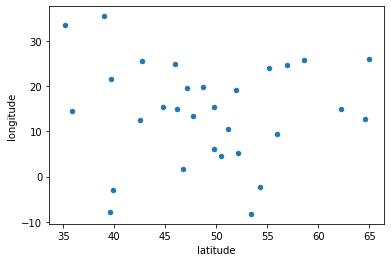

In [14]:
# Quick plot
df.plot.scatter(x='latitude', y='longitude');

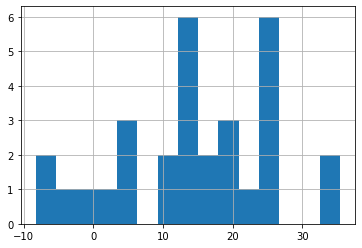

In [15]:
# Quick distribution of a column
df.longitude.hist(bins=15);

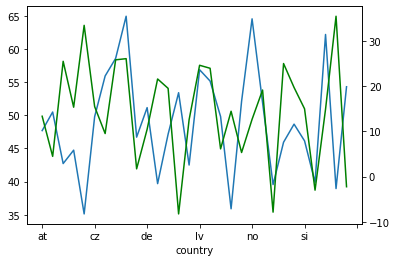

In [16]:
# Multi axis plot
df['latitude'].plot();
df['longitude'].plot(secondary_y=True, style="g");

# Group by

In [17]:
df = pd.read_csv("data/country_sex_age.csv")
df.sample(5)

,country,seasonality,sex,age_group,month,unemployment,unemployment_rate
42290,it,sa,f,y25-74,1997.03,862000,11.6
63130,pl,sa,m,y_lt25,2006.11,268000,24.6
24606,fi,nsa,m,y25-74,1991.07,64000,5.5
70310,se,nsa,f,y_lt25,2008.03,68000,22.9
63746,pl,trend,m,y25-74,2010.03,691000,8.1


In [18]:
df.groupby(['sex', 'age_group']).unemployment_rate.mean()

sex  age_group
f    y25-74        7.566771
     y_lt25       18.457435
m    y25-74        6.244016
     y_lt25       17.098036
Name: unemployment_rate, dtype: float64

In [19]:
df.groupby(['sex', 'age_group']).unemployment_rate.mean().unstack()

age_group,y25-74,y_lt25
sex,,
f,7.566771,18.457435
m,6.244016,17.098036


In [20]:
df.groupby(['sex', 'age_group']).unemployment_rate.mean().reset_index()

,sex,age_group,unemployment_rate
0,f,y25-74,7.566771
1,f,y_lt25,18.457435
2,m,y25-74,6.244016
3,m,y_lt25,17.098036


In [21]:
# Pivot table
df.pivot_table('unemployment_rate', index='sex', columns='seasonality')

seasonality,nsa,sa,trend
sex,,,
f,13.179216,12.908743,12.862163
m,11.708432,11.662290,11.643015


# Merging

In [22]:
unemployment = pd.read_csv('data/country_total.csv')
countries = pd.read_csv("data/countries.csv").drop(columns=['google_country_code','name_fr','name_de'])

In [23]:
#pd.merge(first, second, on=['name', 'id'])
#pd.merge(one, two, left_on='city', right_on='city_name')
df = pd.merge(unemployment, countries, on='country')
df.head()

,country,seasonality,month,unemployment,unemployment_rate,country_group,name_en,latitude,longitude
0,at,nsa,1993.01,171000,4.5,eu,Austria,47.696554,13.34598
1,at,nsa,1993.02,175000,4.6,eu,Austria,47.696554,13.34598
2,at,nsa,1993.03,166000,4.4,eu,Austria,47.696554,13.34598
3,at,nsa,1993.04,157000,4.1,eu,Austria,47.696554,13.34598
4,at,nsa,1993.05,147000,3.9,eu,Austria,47.696554,13.34598


In [24]:
df['name_en'].value_counts().head(15) #.sort_index()

Luxembourg        1008
Belgium           1008
Ireland           1008
Spain             1008
Portugal          1008
Denmark           1008
Netherlands       1008
France            1008
Sweden            1008
United Kingdom    1002
Italy              924
Finland            828
Norway             786
Austria            648
Slovakia           576
Name: name_en, dtype: int64

# Missing Data

In [25]:
df['unemployment_rate'].isnull().sum()

945

In [26]:
df.dropna(subset=['unemployment_rate'], inplace=True)

# Strings

In [27]:
# Modify strings
df['country'] = df['country'].str.upper()
df

,country,seasonality,month,unemployment,unemployment_rate,country_group,name_en,latitude,longitude
0,AT,nsa,1993.01,171000,4.5,eu,Austria,47.696554,13.345980
1,AT,nsa,1993.02,175000,4.6,eu,Austria,47.696554,13.345980
2,AT,nsa,1993.03,166000,4.4,eu,Austria,47.696554,13.345980
3,AT,nsa,1993.04,157000,4.1,eu,Austria,47.696554,13.345980
4,AT,nsa,1993.05,147000,3.9,eu,Austria,47.696554,13.345980
...,...,...,...,...,...,...,...,...,...
20791,UK,trend,2010.06,2429000,7.7,eu,United Kingdom,54.315447,-2.232612
20792,UK,trend,2010.07,2422000,7.7,eu,United Kingdom,54.315447,-2.232612
20793,UK,trend,2010.08,2429000,7.7,eu,United Kingdom,54.315447,-2.232612
20794,UK,trend,2010.09,2447000,7.8,eu,United Kingdom,54.315447,-2.232612


In [28]:
# Get Dummies (get_dummies() can also use a separator as an argument)
df['country_group'].str.get_dummies()[:5]

,eu,non-eu
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [29]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [30]:
# Regex extract
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [31]:
monte.str.split().str[0:1]

0     [Graham]
1       [John]
2      [Terry]
3       [Eric]
4      [Terry]
5    [Michael]
dtype: object

In [ ]:
# Also useful
#str.contains('word')

# JSON

In [32]:
import json

d = json.loads("""
{
  "firstName": "John",
  "lastName": "Smith",
  "isAlive": true,
  "age": 27,
  "address": {
    "streetAddress": "21 2nd Street",
    "city": "New York",
    "state": "NY",
    "postalCode": "10021-3100"
  },
  "phoneNumbers": [
    {
      "type": "home",
      "number": "212 555-1234"
    },
    {
      "type": "office",
      "number": "646 555-4567"
    }
  ],
  "children": [],
  "spouse": null
}
""")

d

{'firstName': 'John',
 'lastName': 'Smith',
 'isAlive': True,
 'age': 27,
 'address': {'streetAddress': '21 2nd Street',
  'city': 'New York',
  'state': 'NY',
  'postalCode': '10021-3100'},
 'phoneNumbers': [{'type': 'home', 'number': '212 555-1234'},
  {'type': 'office', 'number': '646 555-4567'}],
 'children': [],
 'spouse': None}

In [33]:
d.keys()

dict_keys(['firstName', 'lastName', 'isAlive', 'age', 'address', 'phoneNumbers', 'children', 'spouse'])

In [34]:
d['phoneNumbers']

[{'type': 'home', 'number': '212 555-1234'},
 {'type': 'office', 'number': '646 555-4567'}]

In [35]:
df = pd.read_csv('data/movies_metadata.csv')

In [36]:
(df.genres
   # Could be optimized
   .str.replace("'", '"')
   .apply(json.loads)
   .apply(lambda row : [d['name'] for d in row])
   .astype(str)
   # Could be done in a single regex
   .str.replace("[", "")
   .str.replace("]", "")
   .str.get_dummies(',')
)

,'Action','Adventure','Animation','BROSTA TV','Comedy','Crime','Documentary','Drama','Family','Fantasy',...,'Horror','Music','Mystery','Odyssey Media','Romance','Science Fiction','TV Movie','Thriller','War','Western'
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
45462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45463,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
45464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Eval (is evil)
(df.genres
   # Read as python code into list of dicts
   .apply(eval)
   .apply(lambda row : [d['name'] for d in row])
   .astype(str)
   .str.replace("[", "")
   .str.replace("]", "")
   .str.get_dummies(',')
)

,'Action','Adventure','Animation','BROSTA TV','Comedy','Crime','Documentary','Drama','Family','Fantasy',...,'Horror','Music','Mystery','Odyssey Media','Romance','Science Fiction','TV Movie','Thriller','War','Western'
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
45462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45463,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
45464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Time Series
Numpy time format:

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

In [38]:
np.datetime64('2015-07-04') # Day
np.datetime64('2015-07-04 12:00') # Minutes
np.datetime64('2015-07-04 12:59:59.50', 'ns') # Nanosecond

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [39]:
# Operations on a numpy array
np.array('2015-07-04', dtype=np.datetime64) + np.arange(12)
np.array('2015-07-04', dtype=np.datetime64) + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [41]:
# Flexible input
from datetime import datetime
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [42]:
# Change period
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [43]:
#Create range
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [44]:
# Splitting a column
#df[['Year','Month','Date']] = df['Date'].str.split("/", expand=True)

In [ ]:
#df['release_date'] = pd.to_datetime(df['release_date'], format = '%Y-%m-%d', errors='coerce')
#df['day'] = df['release_date'].dt.day
#df['month'] = df['release_date'].dt.month
#df['year'] = df['release_date'].dt.year